# Exercise 3 : Decision Tree

Prepared By: Tan Pei Seng

## Answer for Question 1

### a) What type of attributes of the data?
1. Variance of Wavelet Transformed image 
 * Numerical - They are numbers. 
2. Skewness of Wavelet Transformed image
 * Numerical - They are numbers.
3. Curtosis of Wavelet Transformed image 
 * Numerical - they are numbers.
4. Entropy of image 
 * Numerical - they are numbers.
5. Class
 * Binary - It only contains two integers, which are 0 and 1. 

### b) Explore the data to check, whether is it balance?
Yes, it can be considered as balance. From the calculation in cell 6, the percentage of the class (output) that shows "1" is 44.46% among the total number of rows in the column named "class". This dataset is in 60/40 distribution (60 of class 1 and 40 of class 0) so it can be considered as balance. 

### c) What attribute is useful and what is not? why? 
I would like to say that all the columns in this dataset are useful as each of them is used to differentiate genuine and forged banknote in image processing.
* Variance - used as a filter to determine the edge position [1].
* Skewness - used to make judgements on image surfaces [1]. 
* Kurtosis - used to interpret the noise and resolution measurement [1]. 
* Entropy - used to classify texture [2].

### Reference
1. Vijay, K. and Priyanka, G. (2012). Importance of Statistical Measures in Digital Image Processing.  _International Journal of Emerging Technology and Advanced Engineering, 2_(8). Retrieved from https://www.researchgate.net
2. A. D. Brink,. (1996). Using spatial information as an aid to maximum entropy image threshold selection.  _Pattern Recognition Letters, 17_(1), 29-36. Retrieved from https://www.sciencedirect.com

## Answer for Question 2

### a) Do cross-validation effect algorithms' performance?
The accuracy for the default settings' model is 99.27%. The accuracy for 10-fold and 20-fold cross-validation are 98.36% and 98.08% respectively. The perfomance of the model is decreased but it only slightly affects the algorithms' performance. 

### b) Try using 1 other parameter configurations and compare them to their default configuration. How much they differ?
The criterion parameter is set to "entropy" instead of using "gini"(default) in decision tree algorithm. The new accuracy is 98.54%. The difference is 0.73%. The default algorithm still performs beter.   

In [1]:
import pandas as pd

colNames = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

df=pd.read_csv('banknote.csv', names=colNames)

df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [2]:
df.shape

(1372, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


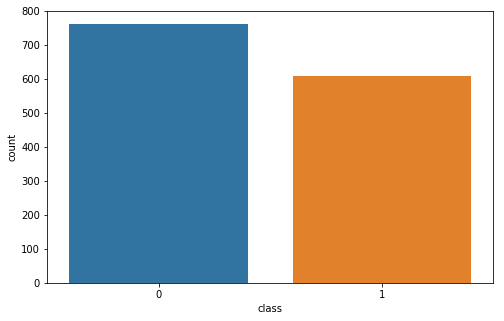

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x="class", data=df)
plt.show()

In [6]:
#Count the percentage of the class that shows "1" among the total number of rows in the "class" column.
Class1=df[df["class"]==1].count()["class"]
Class0=df[df["class"]==0].count()["class"]

print("Total number of Class 1: " + str(Class1))
print("Total number of Class 0: " + str(Class0))
print("Percentage of Class 1 among total number: {}{}".format(Class1/(Class1+Class0)*100, "%"))

Total number of Class 1: 610
Total number of Class 0: 762
Percentage of Class 1 among total number: 44.460641399416915%


In [7]:
from sklearn.model_selection import train_test_split
x=df.iloc[:, 0:-1]
y=df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

The prediction accuracy is: 99.27272727272727%


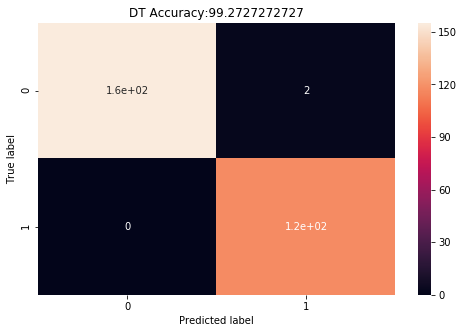

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#Training - Default Settings 
dtree=DecisionTreeClassifier().fit(x_train, y_train)
predict=dtree.predict(x_test)

#Test result shows in the format of accuracy score
print("The prediction accuracy is: {}{}".format(dtree.score(x_test, y_test)*100, "%"))

#Test result shows in the format of confusion matrix
cm=confusion_matrix(y_test, predict)
cm_df=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True)
plt.title("DT Accuracy:" + str(dtree.score(x_test, y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

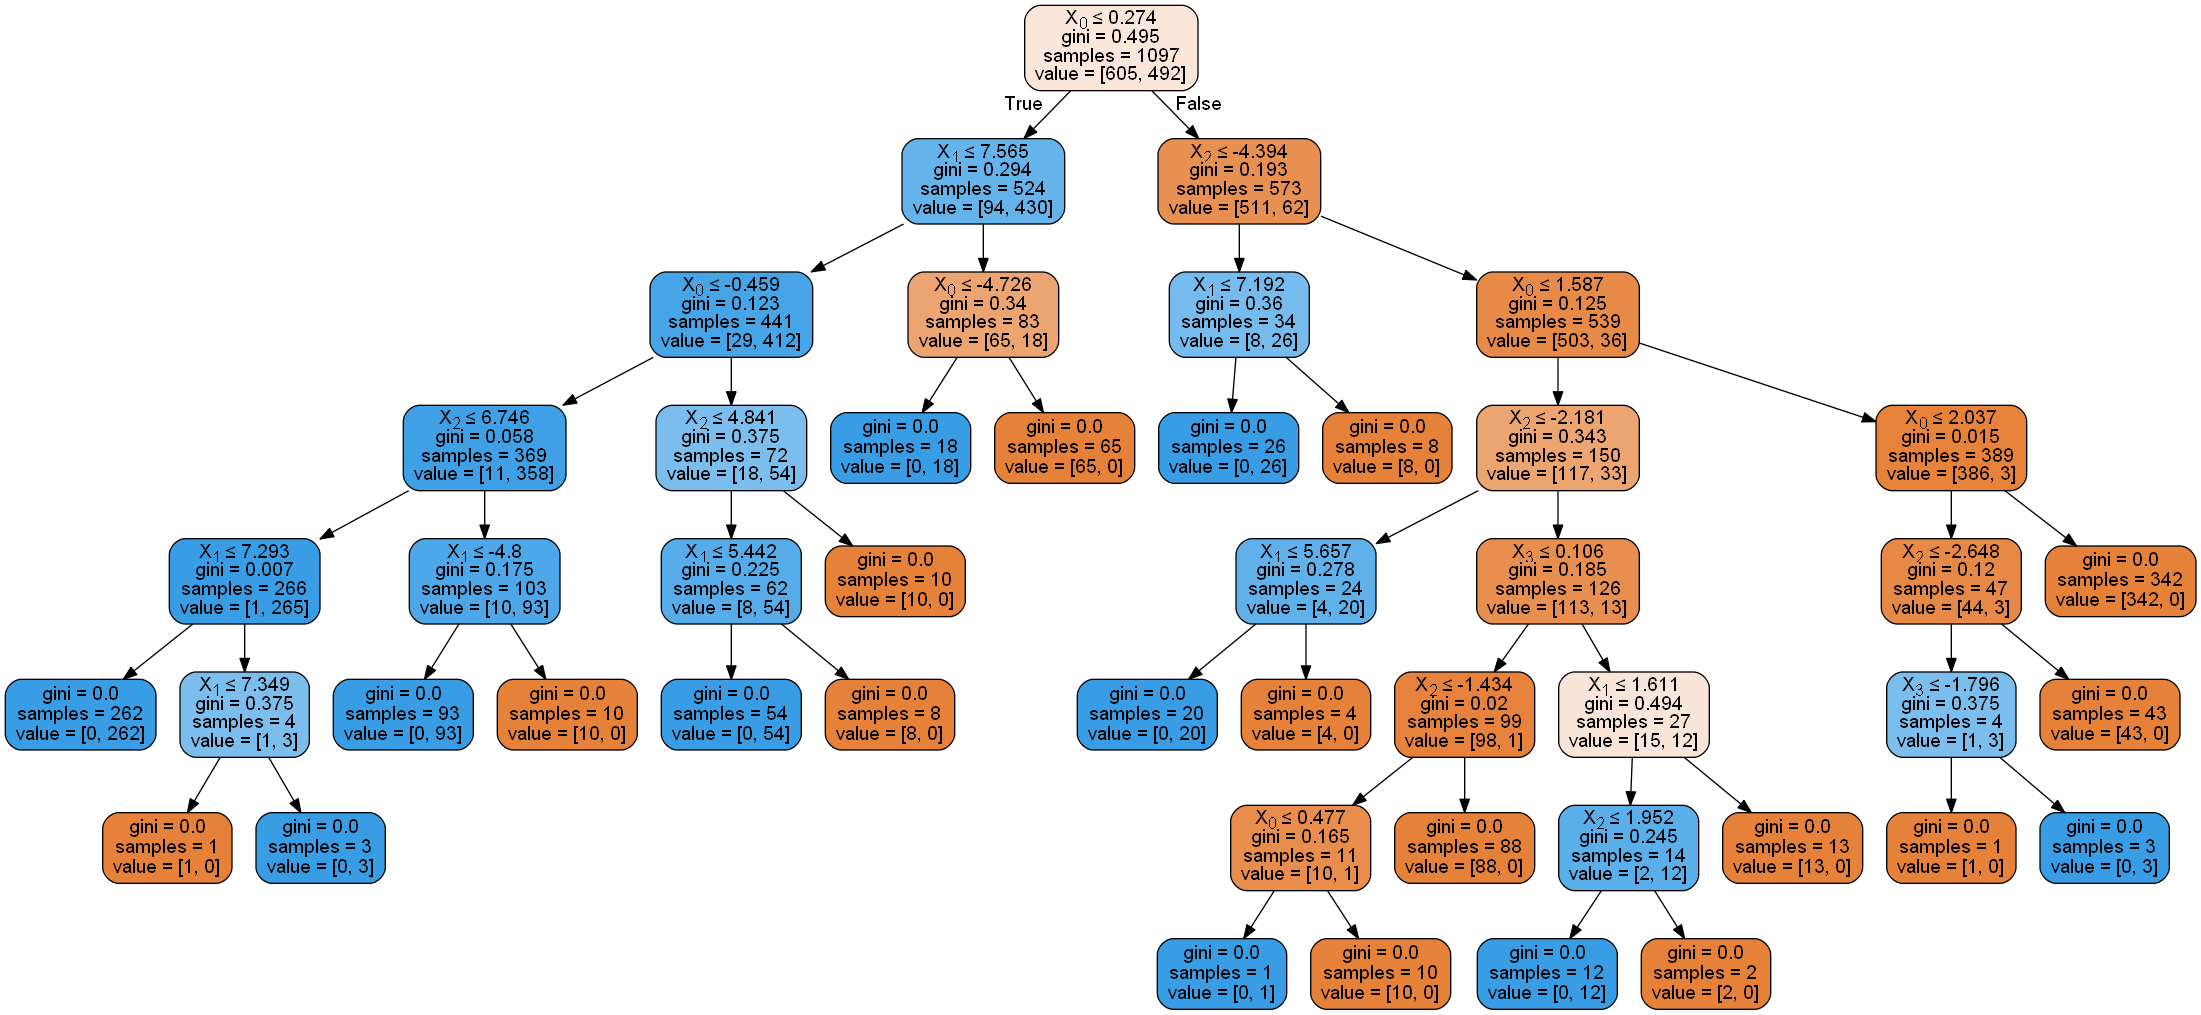

In [9]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [10]:
from sklearn.model_selection import cross_val_score

# CV=10
scores=[]
dtree=DecisionTreeClassifier().fit(x_train, y_train)
score=cross_val_score(dtree, x_train, y_train, cv=10, scoring='accuracy')
scores.append(score.mean())
print("The score is %.2f" % (max(scores)*100))

The score is 98.36


In [11]:
# CV=20
scores=[]
dtree=DecisionTreeClassifier().fit(x_train, y_train)
score=cross_val_score(dtree, x_train, y_train, cv=20, scoring='accuracy')
scores.append(score.mean())
print("The score is %.2f" % (max(scores)*100))

The score is 98.08


The prediction accuracy is: 98.54545454545455%


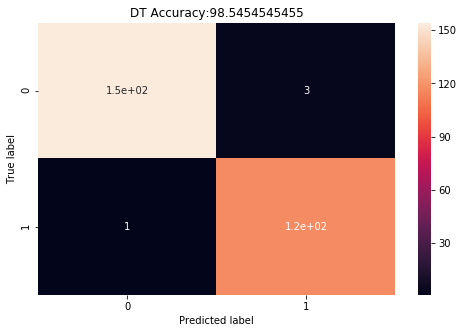

In [12]:
#Training - Criterion->"entropy"
dtree=DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)
predict=dtree.predict(x_test)

#Test result shows in the format of accuracy score
print("The prediction accuracy is: {}{}".format(dtree.score(x_test, y_test)*100, "%"))

#Test result shows in the format of confusion matrix
cm=confusion_matrix(y_test, predict)
cm_df=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True)
plt.title("DT Accuracy:" + str(dtree.score(x_test, y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()